In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import stats

In [2]:
df = pd.read_csv('../datasets/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
map = {'Yes': 1, 'No': 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(map)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [5]:
X = df.drop(['Performance Index', 'Hours Studied'], axis = 1)
y = df['Performance Index']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
x_tr, x_tt, y_tr, y_tt = train_test_split(X, y, train_size=0.8, random_state=0)

In [8]:
model = LinearRegression()
model.fit(x_tr, y_tr)

LinearRegression()

In [9]:
y_pred = model.predict(x_tt)

In [10]:
pd.DataFrame({'Actual': y_tt, 'Predicted': y_pred})

,Actual,Predicted
9394,53.0,53.152313
898,50.0,44.424952
2398,80.0,75.195660
5906,24.0,36.866447
2343,64.0,75.863765
...,...,...
1037,91.0,84.981295
2899,42.0,33.261299
9549,66.0,73.164687
2740,27.0,28.702862


In [11]:
from sklearn.metrics import r2_score

In [12]:
r2 = r2_score(y_tt, y_pred)

n = len(x_tt)
p = x_tt.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('R2 Score: ', r2)
print('Adjusted R2 Score: ', adj_r2)

R2 Score:  0.8291781089108026
Adjusted R2 Score:  0.8288356088785436


In [13]:
from scipy import stats

In [14]:
X.columns

Index(['Previous Scores', 'Extracurricular Activities', 'Sleep Hours',
       'Sample Question Papers Practiced'],
      dtype='object')

In [15]:
_, p_value = stats.f_oneway(X['Extracurricular Activities'], 
                         X['Previous Scores'], 
                         X['Sleep Hours'], 
                         X['Sample Question Papers Practiced'])
print('ANOVA p-value: ', p_value)

ANOVA p-value:  0.0


In [16]:
import statsmodels.api as sm

In [17]:
ols_model = sm.OLS(y_tr, x_tr)
ols_results = ols_model.fit()

In [18]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          9.497e+04
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        23:39:03   Log-Likelihood:                         -28364.
No. Observations:                8000   AIC:                                  5.674e+04
Df Residuals:                    7996   BIC:                                  5.676e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Previous Scores                      0.8871      0.004    219.937      0.000       0.879       0.895
Extracurricular Activities          -0.3991      0.185     -2.161      0.031      -0.761      -0.037
Sleep Hours                         -0.8037      0.042    -19.084      0.000      -0.886      -0.721
Sample Question Papers Practiced    -0.0901      0.032     -2.855      0.004      -0.152      -0.028
==============================================================================
Omnibus:                      512.505   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.002
Skew:                           0.027   Prob(JB):                     1.11e-40
Kurtosis:                       2.259   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

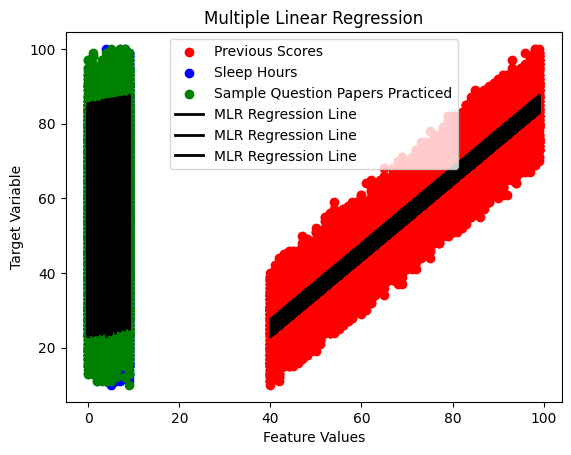

In [46]:
plt.scatter(X['Previous Scores'], y, color='red', label='Previous Scores')
plt.scatter(X['Sleep Hours'], y, color='blue', label='Sleep Hours')
plt.scatter(X['Sample Question Papers Practiced'], y, color='green', label='Sample Question Papers Practiced')
plt.plot(X, model.predict(X), color='black', linewidth=2, label='MLR Regression Line')

plt.xlabel('Feature Values')
plt.ylabel('Target Variable')
plt.title('Multiple Linear Regression')
plt.legend()

plt.show()

In [44]:
# p_value_1 = stats.ttest_ind(X['Extracurricular Activities'], y).pvalue
p_value_2 = stats.ttest_ind(X['Previous Scores'], y).pvalue
p_value_3 = stats.ttest_ind(X['Sleep Hours'], y).pvalue
p_value_4 = stats.ttest_ind(X['Sample Question Papers Practiced'], y).pvalue
print(p_value_2, p_value_3, p_value_4)
np.argmax([p_value_2, p_value_3, p_value_4])

0.0 0.0 0.0


0

In [20]:
X = df.drop(['Performance Index', 'Hours Studied', 'Extracurricular Activities'], axis = 1)
y = df['Performance Index']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
x_tr, x_tt, y_tr, y_tt = train_test_split(X, y, train_size=0.8, random_state=0)

In [23]:
model = LinearRegression()
model.fit(x_tr, y_tr)

LinearRegression()

In [24]:
y_pred = model.predict(x_tt)

In [25]:
pd.DataFrame({'Actual': y_tt, 'Predicted': y_pred})

,Actual,Predicted
9394,53.0,53.539709
898,50.0,44.847344
2398,80.0,75.618304
5906,24.0,36.461742
2343,64.0,76.290158
...,...,...
1037,91.0,85.384058
2899,42.0,32.871039
9549,66.0,72.764045
2740,27.0,29.092828


In [26]:
from sklearn.metrics import r2_score

In [27]:
r2 = r2_score(y_tt, y_pred)

n = len(x_tt)
p = x_tt.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print('R2 Score: ', r2)
print('Adjusted R2 Score: ', adj_r2)

R2 Score:  0.8295421806667758
Adjusted R2 Score:  0.8292859815395214


In [ ]:
plt.scatter(X[''])